In [1]:
import numpy as np
from matplotlib import pyplot
import sys
import numpy as np
from sklearn.neural_network import MLPClassifier
import warnings
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
import gc
import cv2

In [2]:
def loadLabelsFile(filename, n):
  """
  Reads n labels from a file and returns a list of integers.
  """
  labels = []

  with open(filename, 'r', encoding='utf-8') as file:
    for line in file:
      if line == '':
          break
      labels.append(int(line))
  return labels

In [3]:
#Each digit is 28x28 pixels, and each face/non-face image is 60x74 , this is an error data is 60x70 not 74
def digit_train():
    train_digits_X = []

    with open('./digitdata/trainingimages', 'r', encoding='utf-8') as file:

        c = 0
        datum = []
        for line in file:
            l =[]
            for char in line:
                if char == ' ':
                    l.append(int(0))
                elif char == '+':
                    l.append(int(1))
                elif char == '#':
                    l.append(int(2))
            datum.append(l)
            c=c+1
            if c%28 == 0:
                train_digits_X.append(datum)
                datum =[]


    train_digits_X = np.array(train_digits_X,dtype=np.int32)
    train_digits_Y = loadLabelsFile("./digitdata/traininglabels", 5000)

    return train_digits_X,train_digits_Y


def digit_test():
    train_digits_X = []

    with open('./digitdata/testimages', 'r', encoding='utf-8') as file:

        c = 0
        datum = []
        for line in file:
            l =[]
            for char in line:
                if char ==' ':
                    l.append(int(0))
                elif char == '+':
                    l.append(int(1))
                elif char == '#':
                    l.append(int(2))

            datum.append(l)
            c=c+1
            if c%28 == 0:
                train_digits_X.append(datum)
                datum =[]

    train_digits_X = np.array(train_digits_X,dtype=np.int32)
    train_digits_Y = loadLabelsFile("./digitdata/testlabels", 1000)


    return train_digits_X,train_digits_Y



def digit_valid():
    train_digits_X = []

    with open('./digitdata/validationimages', 'r', encoding='utf-8') as file:

        c = 0
        datum = []
        for line in file:
            l =[]
            for char in line:
                if char ==' ':
                    l.append(int(0))
                elif  char == '+':
                    l.append(int(1))
                elif char == '#':
                    l.append(int(2))
            datum.append(l)
            c=c+1
            if c%28 == 0:
                train_digits_X.append(datum)
                datum =[]

    train_digits_X = np.array(train_digits_X,dtype=np.int32)
    train_digits_Y = loadLabelsFile("./digitdata/validationlabels", 1000)
    return train_digits_X , train_digits_Y




def face_train():
    train_digits_X = []

    with open('./facedata/facedatatrain', 'r', encoding='utf-8') as file:

        c = 0
        datum = []
        for line in file:
            l =[]
            for char in line:
                if char ==' ':
                    l.append(int(0))
                elif  char == '+':
                    l.append(int(1))
                elif char == '#':
                    l.append(int(2))
            datum.append(l)
            c=c+1
            if c%70 == 0:
                train_digits_X.append(datum)
                datum =[]

    train_digits_X = np.array(train_digits_X,dtype=np.int32)
    train_digits_Y = loadLabelsFile("./facedata/facedatatrainlabels", 451)


    return train_digits_X , train_digits_Y



def face_valid():
    train_digits_X = []

    with open('./facedata/facedatavalidation', 'r', encoding='utf-8') as file:

        c = 0
        datum = []
        for line in file:
            l =[]
            for char in line:
                if char ==' ':
                    l.append(int(0))
                elif  char == '+':
                    l.append(int(1))
                elif char == '#':
                    l.append(int(2))
            datum.append(l)
            c=c+1
            if c%70 == 0:
                train_digits_X.append(datum)
                datum =[]

    train_digits_X = np.array(train_digits_X,dtype=np.int32)
    train_digits_Y = loadLabelsFile("./facedata/facedatavalidationlabels", 301)
    return train_digits_X , train_digits_Y




def face_test():
    train_digits_X = []

    with open('./facedata/facedatatest', 'r', encoding='utf-8') as file:

        c = 0
        datum = []
        for line in file:
            l =[]
            for char in line:
                if char ==' ':
                    l.append(int(0))
                elif  char == '+':
                    l.append(int(1))
                elif char == '#':
                    l.append(int(2))
            datum.append(l)
            c=c+1
            if c%70 == 0:
                train_digits_X.append(datum)
                datum =[]

    train_digits_X = np.array(train_digits_X,dtype=np.int32)
    train_digits_Y = loadLabelsFile("./facedata/facedatatestlabels", 150)
    return train_digits_X , train_digits_Y

In [4]:
from matplotlib import pyplot as plt

def visualize(t_x):
    #visualize first 9 instances of dataset
    for i in range(9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(t_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()


#Each digit is 28x28 pixels, and each face/non-face image is 60x74 , this is an error data is 60x70 not 74

In [126]:
def DecisionTree(t_x,t_y,cv_x,cv_y,tst_x,tst_y) :    
    flat_t_x = t_x.reshape(t_x.shape[0],t_x.shape[1]*t_x.shape[2])
    flat_cv_x = cv_x.reshape(cv_x.shape[0],cv_x.shape[1]*cv_x.shape[2])
    flat_tst_x = tst_x.reshape(tst_x.shape[0],tst_x.shape[1]*tst_x.shape[2]) 
    
    DT_Scores = []
    
    for i in range(1,21):
        dt = DecisionTreeClassifier(criterion="gini", max_depth=i, min_samples_leaf=1,random_state=42)
        dt.fit(flat_t_x,t_y)
        DT_Scores.append(dt.score(flat_cv_x,cv_y))
    
    highest_DT = DT_Scores.index(max(DT_Scores))
    
    dt = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=1, random_state=42)
    
    dt.fit(flat_t_x,t_y)
    test_score = dt.score(flat_tst_x,tst_y)
    return  DT_Scores, test_score
    

In [127]:
def results(face_or_digit) :

    if(face_or_digit=="digit"):
        tr_x, tr_y = digit_train()
        cv_x, cv_y = digit_valid()
        tst_x, tst_y = digit_test()
    else :
        tr_x, tr_y = face_train()
        cv_x, cv_y = face_valid()
        tst_x, tst_y = face_test()
        
    score_digit, tst_score_digit = DecisionTree(tr_x, tr_y, cv_x, cv_y, tst_x, tst_y)
    highest_DT = score_digit.index(max(score_digit)) 
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(range(1,21), score_digit, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='purple', markersize=10)
    
    plt.title(f'Score vs. minimum number of samples required to be at a leaf node for {face_or_digit}')
    plt.xlabel('max_depth')
    plt.ylabel('Score')
    print(f"Maximum score for {face_or_digit} : ", score_digit[highest_DT]*100, "at max_depth", highest_DT+1)

    plt.show()

    print(f"Training accuracy for {face_or_digit}: ", tst_score_digit * 100, '%')

digit sample data


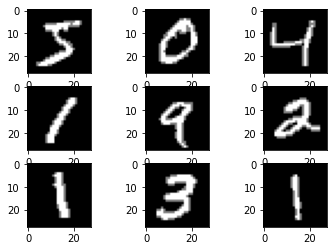

Maximum score for digit :  76.8 at max_depth 12


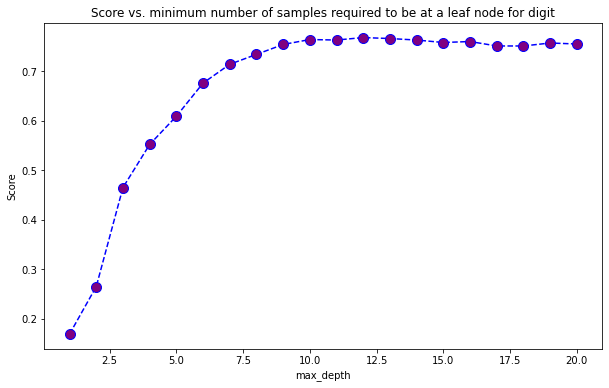

Training accuracy for digit:  74.7 %


In [128]:
print("digit sample data")
visualize(digit_train()[0])
results("digit")

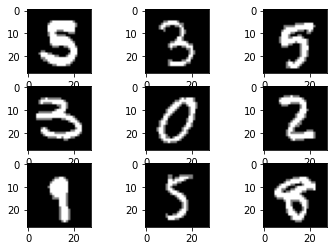

[3 7 9]
[0 9 8]
[8 3 3]


In [120]:
tst_x, tst_y = digit_test()
tst, tst_y = digit_test()
t_x, t_y = digit_train()
tst_y = np.asarray(tst_y)
flat_t_x = t_x.reshape(t_x.shape[0],t_x.shape[1]*t_x.shape[2])
flat_tst_x = tst_x.reshape(tst_x.shape[0],tst_x.shape[1]*tst_x.shape[2])

dt = DecisionTreeClassifier(criterion="gini", max_depth=32, max_features=784, random_state= 30)
dt.fit(flat_t_x,t_y)
misclassified = np.where(tst_y != dt.predict(flat_tst_x))
msc = tst[misclassified]
visualize(msc)
msc_y = dt.predict(flat_tst_x[misclassified])
print(msc_y[0:3])
print(msc_y[3:6])
print(msc_y[6:9])

digit sample data


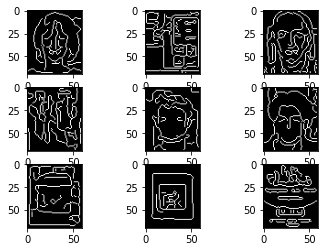

accuracy score is: 
Maximum score for face :  77.0764119601329 at max_depth 11


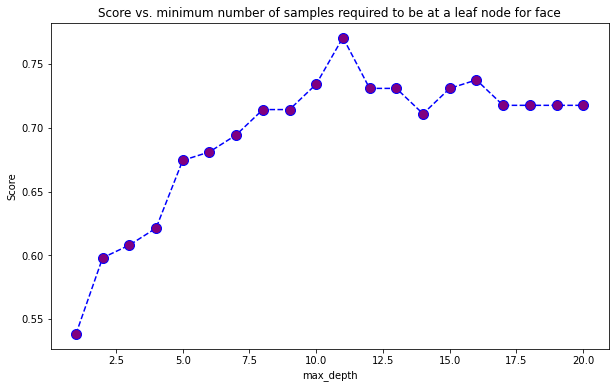

Training accuracy for face:  68.0 %


In [129]:
print("digit sample data")
visualize(face_train()[0])
print("accuracy score is: ")
results("face")

In [ ]:
tst_x, tst_y = face_test()
tst, tst_y = face_test()
t_x, t_y = face_train()
tst_y = np.asarray(tst_y)
flat_t_x = t_x.reshape(t_x.shape[0],t_x.shape[1]*t_x.shape[2])
flat_tst_x = tst_x.reshape(tst_x.shape[0],tst_x.shape[1]*tst_x.shape[2])

dt = DecisionTreeClassifier(criterion="gini", max_depth=32, max_features=784, random_state= 30)
dt.fit(flat_t_x,t_y)
misclassified = np.where(tst_y != dt.predict(flat_tst_x))
msc = tst[misclassified]
visualize(msc)
msc_y = dt.predict(flat_tst_x[misclassified])
right_vals = tst_y[misclassified]
print("classifier values\n")
print(msc_y[0:3])
print(msc_y[3:6])
print(msc_y[6:9])
right_vals = tst_y[misclassified]

print("\ntrue values \n")
print(right_vals[0:3])
print(right_vals[3:6])
print(right_vals[6:9])
